In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data= pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
X=pd.get_dummies(data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]])
y=data[['Outcome']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.15,random_state=0)

In [12]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
279            2      108             62             10      278  25.3   
258            1      193             50             16      375  25.9   
249            1      111             86             19        0  30.1   
740           11      120             80             37      150  42.3   
725            4      112             78             40        0  39.4   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
279                     0.881   22  
258                     0.655   24  


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Thund\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [10]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
206,8,196,76,29,280,37.5,0.605,57,1
640,0,102,86,17,105,29.3,0.695,27,0
649,0,107,60,25,0,26.4,0.133,23,0
11,10,168,74,0,0,38.0,0.537,34,1
763,10,101,76,48,180,32.9,0.171,63,0


In [15]:
print(classifier.predict(sc.transform([[8,196,76,29,280,37.5,0.605,57]])))

[1]


In [16]:
print(classifier.predict(sc.transform([[0,102,86,17,105,29.3,0.695,27]])))

[0]


In [17]:
print(classifier.predict(sc.transform([[0,107,60,25,0,26.4,0.133,23]])))

[0]


In [18]:
print(classifier.predict(sc.transform([[10,168,74,0,0,38.0,0.537,34]])))

[1]


In [19]:
print(classifier.predict(sc.transform([[10,101,76,48,180,32.9,0.171,63]])))

[0]


In [20]:
y_pred=classifier.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1], dtype=int64)

In [22]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
214,1
586,1
187,1
415,1


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay

In [29]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[72  6]
 [14 24]]


In [30]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

<function matplotlib.pyplot.show(close=None, block=None)>

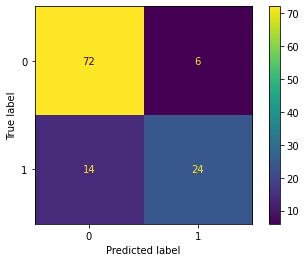

In [31]:
disp.plot()
plt.show

In [32]:
accuracy_score(y_test,y_pred)

0.8275862068965517

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.25,random_state=0)

In [34]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
762            9       89             62              0        0  22.5   
127            1      118             58             36       94  33.3   
564            0       91             80              0        0  32.4   
375           12      140             82             43      325  39.2   
663            9      145             80             46      130  37.9   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
192            7      159             66              0        0  30.4   
629            4       94             65             22        0  24.7   
559           11       85             74              0        0  30.1   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  
762                     0.142   33  
127                     0.261   23  


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\Thund\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [37]:
print(classifier.predict(sc.transform([[8,196,76,29,280,37.5,0.605,57]])))

[1]


In [38]:
print(classifier.predict(sc.transform([[0,102,86,17,105,29.3,0.695,27]])))

[0]


In [39]:
print(classifier.predict(sc.transform([[0,107,60,25,0,26.4,0.133,23]])))

[0]


In [40]:
print(classifier.predict(sc.transform([[10,168,74,0,0,38.0,0.537,34]])))

[1]


In [41]:
print(classifier.predict(sc.transform([[10,101,76,48,180,32.9,0.171,63]])))

[0]


In [42]:
y_pred=classifier.predict(X_test)

In [43]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
366,1
301,1
382,0
140,0


In [45]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[117  13]
 [ 26  36]]


In [46]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

<function matplotlib.pyplot.show(close=None, block=None)>

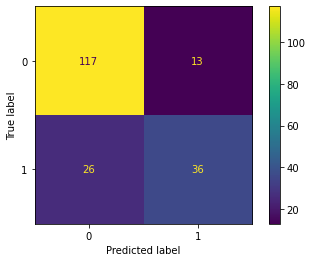

In [47]:
disp.plot()
plt.show

In [48]:
accuracy_score(y_test,y_pred)

0.796875